In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-claim/insurance_claims.csv


In [2]:
df=pd.read_csv("/kaggle/input/insurance-claim/insurance_claims.csv")

In [3]:
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.shape

(1000, 39)

In [6]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [9]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [10]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [11]:
fraud=df[df['fraud_reported']=='Y']

In [12]:
fraud['policy_number'].value_counts()[:10]

261119    1
730819    1
414913    1
143038    1
621756    1
347984    1
500639    1
753844    1
431283    1
373935    1
Name: policy_number, dtype: int64

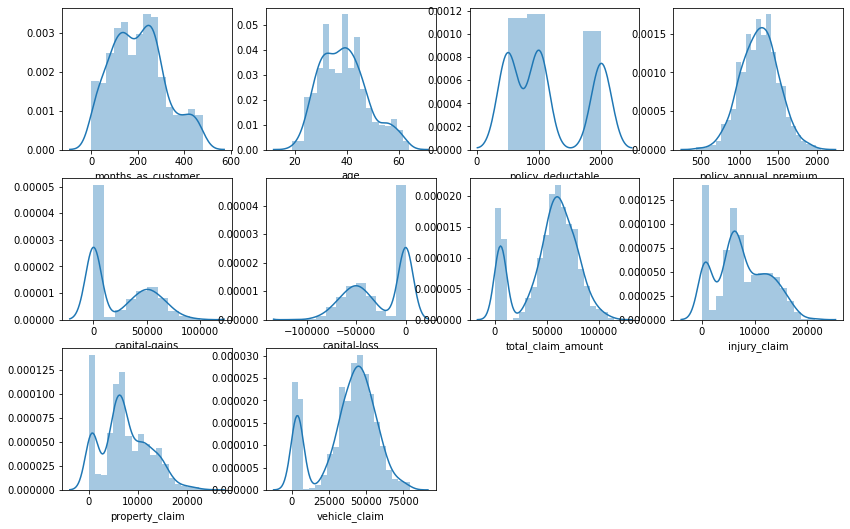

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

col=['months_as_customer','age','policy_deductable','policy_annual_premium','capital-gains', 'capital-loss','total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim']

plt.figure(figsize=(14,12))
k=1
for i in col:
    plt.subplot(4,4,k)
    sns.distplot(df[i])
    k=k+1
plt.show()


Almost all the data above are normally distributed.

In [14]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [15]:
a=df[df['umbrella_limit']>0]

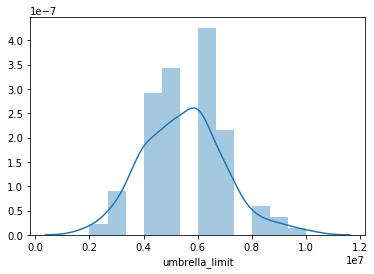

In [16]:
sns.distplot(a['umbrella_limit'])

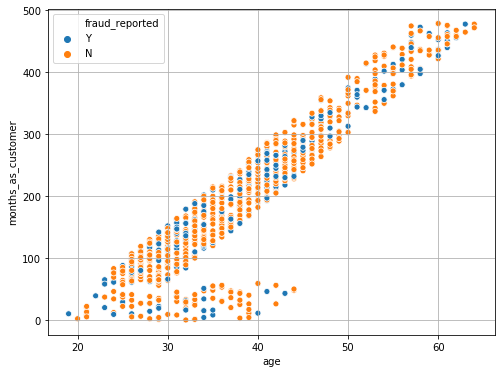

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='months_as_customer',hue='fraud_reported',data=df)
plt.grid(True)
plt.show()

There is no pattern that justifies if the customers are with the company for more years and are claiming the fraud claims.

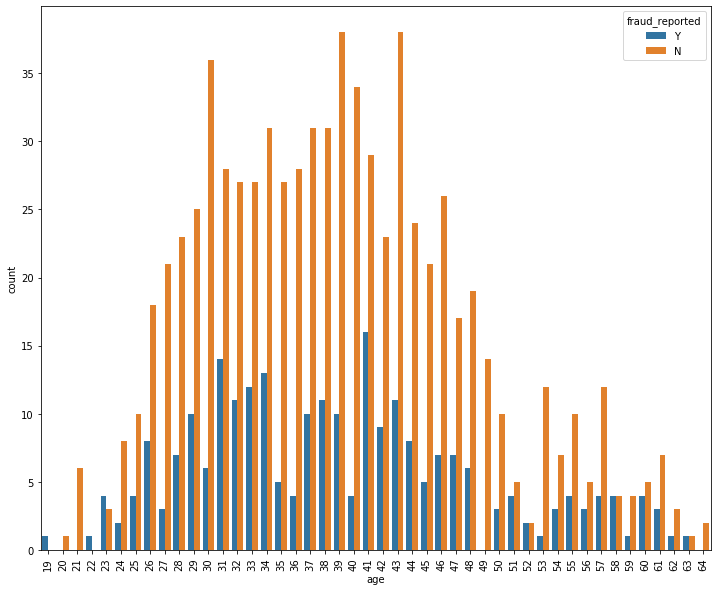

In [18]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['age'],hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

In [19]:
a=df[df['fraud_reported']=='Y']
a[['policy_number','insured_occupation','insured_education_level','total_claim_amount']].sort_values('total_claim_amount',ascending=False)[:20]

,policy_number,insured_occupation,insured_education_level,total_claim_amount
149,217938,craft-repair,JD,112320
163,346940,prof-specialty,Masters,107900
479,753844,sales,MD,104610
145,515050,exec-managerial,Associate,99320
247,187775,other-service,JD,98670
91,127754,tech-support,Associate,98340
974,291006,transport-moving,JD,98280
23,115399,priv-house-serv,MD,98160
41,616337,transport-moving,Associate,97080
796,728025,machine-op-inspct,Masters,92730


There are 20 Policies that have frauds and are listed above and the Policy_Number ='217938' has claimed '$112320' amount.

In [20]:
a['insured_occupation'].value_counts()

exec-managerial      28
tech-support         22
craft-repair         22
machine-op-inspct    22
transport-moving     21
sales                21
prof-specialty       18
armed-forces         17
farming-fishing      16
protective-serv      14
other-service        12
priv-house-serv      12
handlers-cleaners    11
adm-clerical         11
Name: insured_occupation, dtype: int64

In [21]:
a['insured_education_level'].value_counts()

JD             42
MD             38
High School    36
Associate      34
PhD            33
Masters        32
College        32
Name: insured_education_level, dtype: int64

People whose education level is 'JD' and working as 'exec-manegerial' have more fraud claims.

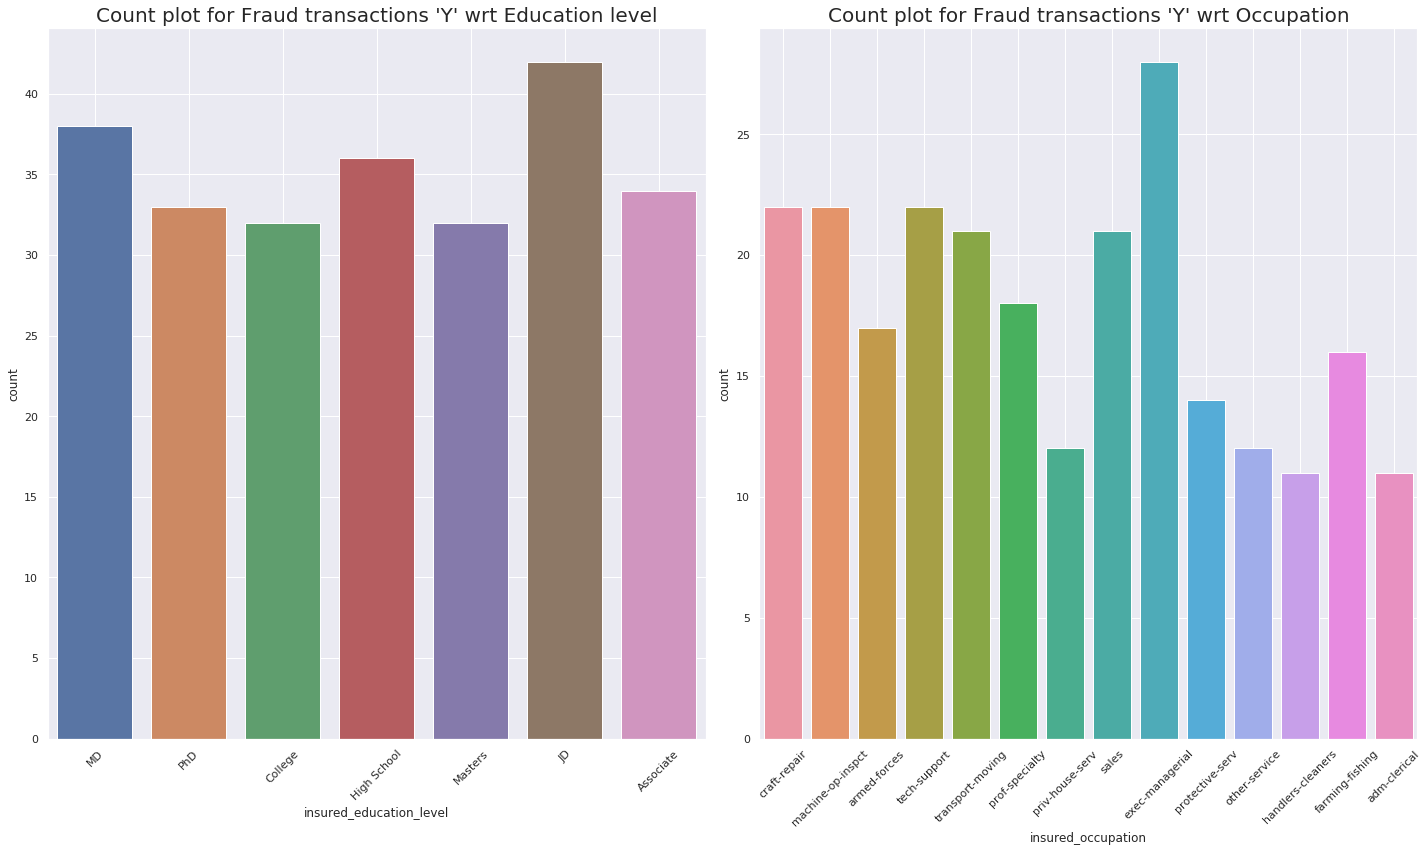

In [22]:
sns.set(style="darkgrid")

plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
plt.title("Count plot for Fraud transactions 'Y' wrt Education level",fontsize=20)
sns.countplot('insured_education_level',data=a)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.subplot(1,2,2)
plt.title("Count plot for Fraud transactions 'Y' wrt Occupation",fontsize=20)
sns.countplot('insured_occupation',data=a)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

People with education level as 'JD' are much involved in fraud transactions.
People with occupation as 'exec-managerial' are much involved in fraud transactions.

In [23]:
#Looking at below claim_amount:
a_claims=pd.pivot_table(a,values='total_claim_amount',index=['insured_occupation','insured_education_level']).sort_values('total_claim_amount',ascending=False)

cm=sns.light_palette("black", as_cmap=True)
a_claims.style.background_gradient(cmap=cm)

People from occupation sector as Protective-services and education level as JD have highest fraud claimed amount of 87,890$.

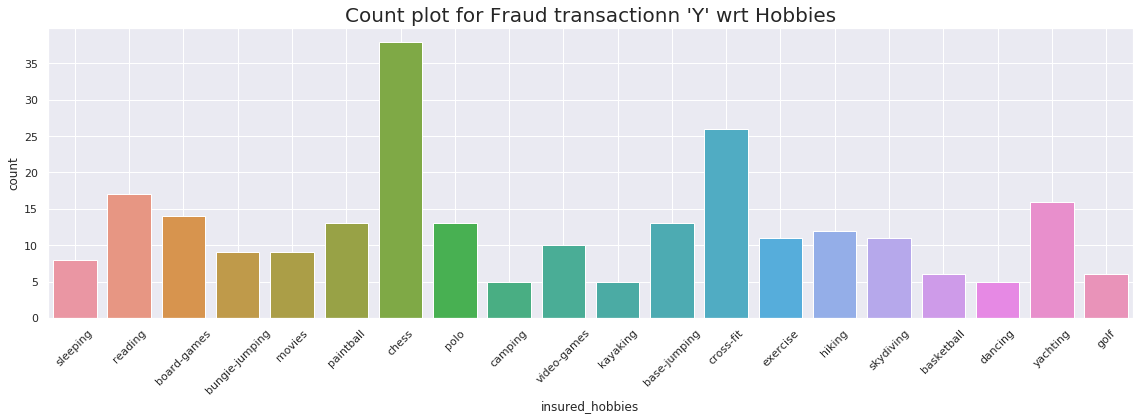

In [24]:
plt.figure(figsize=(16,6))
plt.title("Count plot for Fraud transactionn 'Y' wrt Hobbies",fontsize=20)
sns.countplot('insured_hobbies',data=a)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

People who have the hobbies of 'chess' and 'cross-fit' are tend to do the fraud claims.

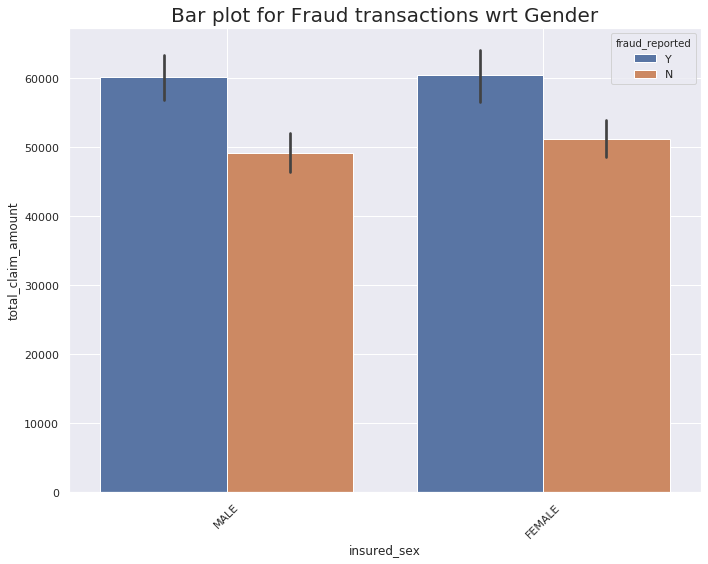

In [25]:
plt.figure(figsize=(10,8))
plt.title("Bar plot for Fraud transactions wrt Gender",fontsize=20)
sns.barplot(x='insured_sex',y='total_claim_amount',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Both Male and Female are tend to do the fraud claims similarly.

In [26]:
a['insured_relationship'].value_counts()

other-relative    52
not-in-family     45
wife              42
own-child         39
husband           35
unmarried         34
Name: insured_relationship, dtype: int64

In [27]:
profit=df['capital-gains']-df['capital-loss']
df1=df
df1['profit']=profit

In [28]:
df1.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'profit'],
      dtype='object')

In [29]:
df[['policy_number','profit']].sort_values('profit',ascending=False)[0:20]

,policy_number,profit
807,250833,192000
533,840806,164100
59,485372,153300
679,774303,151100
353,958785,150600
523,190588,149400
613,831053,148000
846,545506,142500
507,925128,142300
598,507545,141600


In [30]:
df[['incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city',
   'incident_location','incident_hour_of_the_day','number_of_vehicles_involved']]

,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved
0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1
1,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1
2,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3
3,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1
4,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1
...,...,...,...,...,...,...,...,...,...,...
995,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1
996,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1
997,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3
998,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1


In [31]:
pd.pivot_table(a,values=['number_of_vehicles_involved','total_claim_amount','vehicle_claim','incident_hour_of_the_day'],index=['incident_type','collision_type']).sort_values('vehicle_claim',ascending=False)

incident_hour_of_the_day  \
incident_type            collision_type                              
Single Vehicle Collision Front Collision                 11.595238   
                         Side Collision                  11.787879   
                         Rear Collision                  11.071429   
Multi-vehicle Collision  Side Collision                  11.432432   
                         Front Collision                 11.892857   
                         Rear Collision                  14.142857   
Parked Car               ?                                7.000000   
Vehicle Theft            ?                                5.375000   

                                          number_of_vehicles_involved  \
incident_type            collision_type                                 
Single Vehicle Collision Front Collision                     1.000000   
                         Side Collision                      1.000000   
                         Rear Collision                      1.000000   
Multi-vehicle Collision  Side Collision                      2.972973   
                         Front Collision                     2.964286   
                         Rear Collision                      3.081633   
Parked Car               ?                                   1.000000   
Vehicle Theft            ?                                   1.000000   

                                          total_claim_amount  vehicle_claim  
incident_type            collision_type                                      
Single Vehicle Collision Front Collision        66596.190476   49030.000000  
                         Side Collision         68009.696970   48481.212121  
                         Rear Collision         65782.857143   47616.666667  
Multi-vehicle Collision  Side Collision         62281.621622   45308.648649  
                         Front Collision        60970.000000   43860.000000  
                         Rear Collision         61152.448980   43474.693878  
Parked Car               ?                       5093.750000    3711.250000  
Vehicle Theft            ?                       5197.500000    3665.000000

For Auto claims, single vehicle collision have claimed the highesht amount in the current data set.

In [32]:
df['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

In [33]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [34]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [35]:
#For collision_type there are junk values as '?' that are nan values and has to be replaced/removed:
#Let's see what kind of incident we have for the junk (?) values:
coll=a[['incident_type','collision_type']]

In [36]:
res=coll.loc[coll['collision_type']=='?']

In [37]:
res['incident_type'].value_counts()

Parked Car       8
Vehicle Theft    8
Name: incident_type, dtype: int64

8 Parked Cars and 8 Vehicle Theft cars have fraud claimed.

In [38]:
coll_df=df[['incident_type','collision_type']]

In [39]:
res_df=coll_df.loc[coll_df['collision_type']=='?']

In [40]:
res_df['incident_type'].value_counts()

Vehicle Theft    94
Parked Car       84
Name: incident_type, dtype: int64

Cars that are stolen (Vehicle Theft) and cars that are parked (Parked Cars) are marked as '?', so we shall replace with these values with either NA or No collision

In [41]:
df['collision_type']=df['collision_type'].replace("?","Not Applicable")

In [42]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Not Applicable     178
Name: collision_type, dtype: int64

In [43]:
a['incident_city'].value_counts()

Arlington      44
Columbus       39
Springfield    38
Hillsdale      35
Northbend      34
Riverwood      30
Northbrook     27
Name: incident_city, dtype: int64

People from the city - 'Arlington' have more auto related incidents that are fraud claimed.

In [44]:
pd.pivot_table(a,values=['total_claim_amount','vehicle_claim'],index=['incident_state','incident_city']).sort_values('total_claim_amount',ascending=False)[:20]

,,total_claim_amount,vehicle_claim
incident_state,incident_city,,
SC,Riverwood,78980.000000,56553.333333
OH,Columbus,78100.000000,54670.000000
NC,Northbrook,76653.333333,55346.666667
WV,Northbrook,75205.000000,53997.500000
SC,Springfield,73116.666667,50267.500000
NY,Northbrook,69730.000000,50758.571429
NC,Springfield,69270.000000,51032.000000
NY,Springfield,67157.000000,47976.000000
OH,Northbrook,66550.000000,46585.000000


Riverwood city from the state - SC have claimed maximum number of frauds for auto insurance.

In [45]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'profit'],
      dtype='object')

In [46]:
a.loc[(a['property_claim'] == 0.0)&(a['vehicle_claim'] != 0.0)]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
60,154,34,598554,14-02-1990,IN,100/300,500,795.23,0,609216,...,1,?,69480,15440,0,54040,Nissan,Maxima,2014,Y
155,375,50,120485,18-02-2007,OH,100/300,1000,1275.39,0,466283,...,3,NO,37280,0,0,37280,Audi,A5,1996,Y
705,274,45,589094,27-05-2003,IN,250/500,1000,1353.53,0,451467,...,0,NO,58500,11700,0,46800,Accura,MDX,1995,Y
803,123,29,379268,05-08-2012,IN,250/500,500,1209.63,0,447188,...,0,YES,73260,16280,0,56980,Volkswagen,Jetta,2014,Y
843,297,48,264221,28-07-2014,IL,500/1000,1000,1243.68,0,463331,...,2,?,54960,6870,0,48090,Toyota,Corolla,2002,Y
938,147,31,746630,10-02-1997,IN,250/500,500,1054.92,6000000,468232,...,0,?,68240,8530,0,59710,Toyota,Corolla,2013,Y


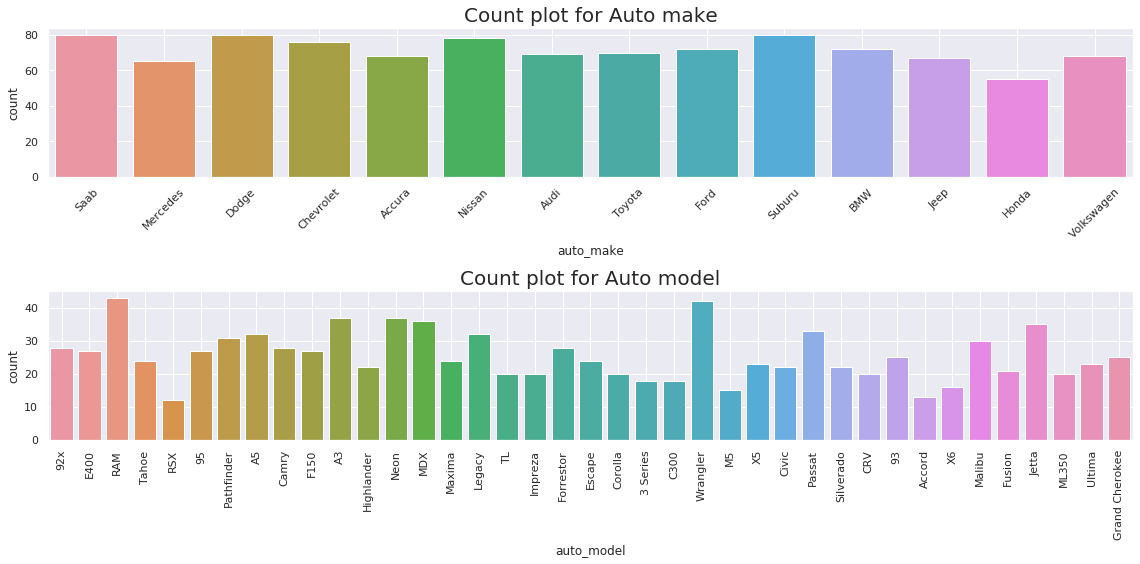

In [47]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title("Count plot for Auto make",fontsize=20)
sns.countplot('auto_make',data=df)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.subplot(2,1,2)
plt.title("Count plot for Auto model",fontsize=20)
sns.countplot('auto_model',data=df)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
a['auto_make'].value_counts()

Mercedes      22
Ford          22
Chevrolet     21
Audi          21
Dodge         20
BMW           20
Volkswagen    19
Suburu        19
Saab          18
Honda         14
Nissan        14
Toyota        13
Accura        13
Jeep          11
Name: auto_make, dtype: int64

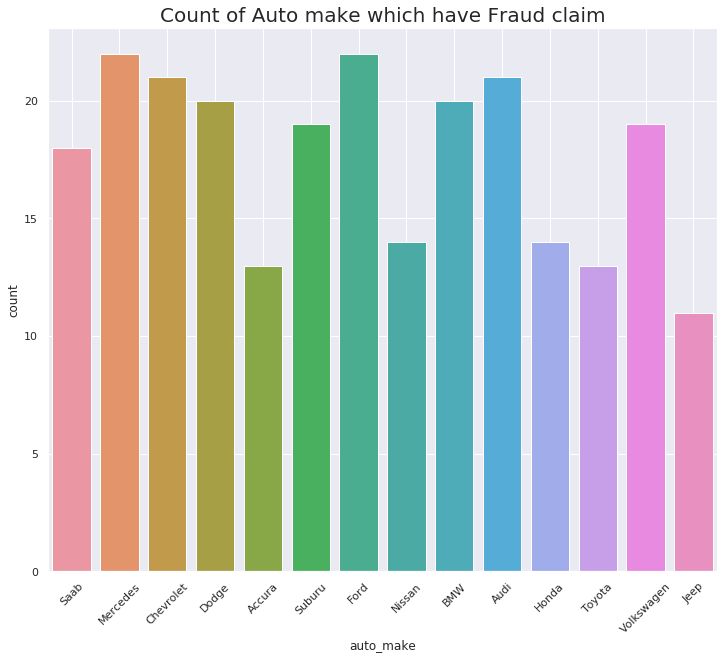

In [49]:
plt.figure(figsize=(12,10))
sns.countplot('auto_make',data=a)
plt.title("Count of Auto make which have Fraud claim",fontsize=20)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Auto make of the company's Mercedes, Ford, Audi are having highest fraud claims.Chevrolet, Dodge, BMW are as wellhave the fraud claims.

In [50]:
pd.pivot_table(a,values=['vehicle_claim'],index=['auto_make','auto_model','policy_number']).sort_values('vehicle_claim',ascending=False)[:20]

vehicle_claim
auto_make auto_model policy_number               
Suburu    Impreza    217938                 77760
Accura    TL         515050                 76400
Chevrolet Tahoe      291006                 75600
Dodge     Neon       346940                 75530
          RAM        115399                 73620
Honda     Accord     127754                 71520
Toyota    Highlander 209177                 69210
Chevrolet Tahoe      187775                 68310
Ford      Escape     626208                 67590
Mercedes  E400       728025                 67440
          ML350      753844                 66570
BMW       X6         752504                 66560
          X5         616337                 64720
Mercedes  C300       442795                 64480
BMW       X6         730819                 63920
Mercedes  C300       991553                 63280
Suburu    Legacy     691115                 62640
Audi      A5         356590                 62100
Jeep      Wrangler   951863                 61760
Dodge     Neon       332867                 61740

Person having Policy number - 217938 on the vehicle - Suburu-Impreza has claimed an amount of $77760 which is identified as fraud.

In [51]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'profit'],
      dtype='object')

In [52]:
a['bodily_injuries'].value_counts()

2    90
0    80
1    77
Name: bodily_injuries, dtype: int64

In [53]:
a['police_report_available'].value_counts()

?      89
NO     86
YES    72
Name: police_report_available, dtype: int64

Even when the police report is available there policies that have fraud claimed.

In [54]:
df['police_report_available']=df['police_report_available'].replace("?","Unknown")

In [55]:
df['police_report_available'].value_counts()

NO         343
Unknown    343
YES        314
Name: police_report_available, dtype: int64

In [56]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'profit'],
      dtype='object')

In [57]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [58]:
df['umbrella_limit']=df['umbrella_limit'].replace(-1000000 ,0)

In [59]:
df['umbrella_limit'].value_counts()

0           799
6000000      57
5000000      46
4000000      39
7000000      29
3000000      12
8000000       8
9000000       5
2000000       3
10000000      2
Name: umbrella_limit, dtype: int64

In [60]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [61]:
df2=df

In [62]:
df2.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'profit'],
      dtype='object')

In [63]:
df2=df2.drop(['policy_number', 'policy_bind_date', 'insured_zip','incident_date','authorities_contacted','profit','auto_make', 'auto_model'],axis=1)

In [64]:
df2.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported'],
      dtype='object')

In [65]:
df2=pd.get_dummies(df2,columns=['policy_state','policy_csl','insured_sex','insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship','incident_type', 'collision_type', 'incident_severity',
       'incident_state', 'incident_city', 'incident_location','property_damage','police_report_available'],drop_first=True)

In [66]:
df2.shape

(1000, 1089)

In [67]:
df2.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries',
       ...
       'incident_location_9918 Andromedia Drive',
       'incident_location_9929 Rock Drive', 'incident_location_9935 4th Drive',
       'incident_location_9942 Tree Ave', 'incident_location_9980 Lincoln Ave',
       'incident_location_9988 Rock Ridge', 'property_damage_NO',
       'property_damage_YES', 'police_report_available_Unknown',
       'police_report_available_YES'],
      dtype='object', length=1089)

In [68]:
x=df2.drop(['fraud_reported'],axis=1)

In [69]:
y=df2['fraud_reported']

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [71]:
x_scale=sc.fit_transform(x)

In [72]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x_scaled=pca.fit_transform(x_scale)

In [73]:
pca.explained_variance_ratio_

array([0.00633006, 0.00283677, 0.00267228, 0.00260718, 0.00255916,
       0.00248222, 0.0024381 , 0.00240789, 0.00236846, 0.00236434,
       0.00234861, 0.0023237 , 0.00227658, 0.00225439, 0.00223961,
       0.00220332, 0.00219335, 0.00218349, 0.00217838, 0.00215085,
       0.00213843, 0.00212524, 0.00210345, 0.00208783, 0.00205923,
       0.00205436, 0.00203929, 0.00202794, 0.00201316, 0.00200768,
       0.00198667, 0.00198048, 0.00195864, 0.00195597, 0.0019227 ,
       0.00191542, 0.00190978, 0.00190105, 0.00188966, 0.00188003,
       0.00187148, 0.00186606, 0.00185521, 0.0018366 , 0.0018276 ,
       0.00182352, 0.00181067, 0.00180201, 0.00177566, 0.00176287,
       0.00175629, 0.00175308, 0.00172565, 0.00171227, 0.00169507,
       0.00168665, 0.0016821 , 0.00166195, 0.00165223, 0.00164131,
       0.00163442, 0.00162224, 0.00161185, 0.00160597, 0.0015807 ,
       0.00156031, 0.00154953, 0.0015365 , 0.00151434, 0.00147915,
       0.00139135, 0.00135163, 0.0013473 , 0.00133971, 0.00129

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3)

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf=RandomForestClassifier(criterion='entropy')

In [77]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
y_pred=rf.predict(x_test)

In [79]:
rf.score(x_test,y_test)

0.7766666666666666

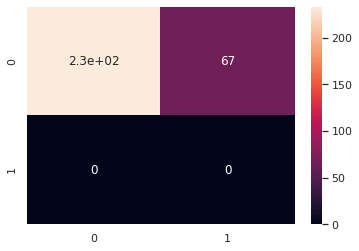

In [80]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [81]:
clf=classification_report(y_pred,y_test)
print(clf)

              precision    recall  f1-score   support

           N       1.00      0.78      0.87       300
           Y       0.00      0.00      0.00         0

    accuracy                           0.78       300
   macro avg       0.50      0.39      0.44       300
weighted avg       1.00      0.78      0.87       300



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
